<a href="https://colab.research.google.com/github/rohitpawar4507/Tensorflow-Image-Classification/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Flipkart product reviws dataset This Dataset consists of reviews by customers on boAt Rockerz 400

The dataset consists of 2 columns

Review: Reviews given by the customer
Rating: Ratings given by the customer
The ratings are number of Stars given my customer to the product.
These stars can be interpreted in many ways like

Sentiment ( Positive or Negative )
This can be achieved by forming into a binary classification model with a threshold function like

rating >=4 -> Positive
rating <4 -> Negative
Ratings
This can be achieved by considering ratings as individual class

Several other visualisations, interpretations and models can be drawn from the dataset.**

In [1]:
# Importing libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [55]:
df = pd.read_csv('data.csv')


In [57]:
df.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


In [58]:
# veryfying the sentiment values
# 1 is positive sentiment and 0 is negative sentiment
df['rating'].value_counts()


5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [59]:
# pre-processing the data
# define a function to remove the @mentions and other useless text from the tweets

import re

def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

In [60]:
# applying the text cleaning function on tweets
df['review'] = df['review'].apply(text_cleaning)
df.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


In [61]:
# splitting the data into training and testing data

from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df['review'].values, df['rating'].values, test_size=0.30)

In [63]:
# checking the data split
print('review: ', x_train[0])
print('rating: ', y_train[0])


review:  Product is awesome but a little bit uncomfortable . Overall a nice productREAD MORE
rating:  4


In [64]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [65]:
# instantiating the tokenizer
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [67]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print('The size of datatset vocab is: ', V)

The size of datatset vocab is:  6844


In [68]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [7, 2, 26, 15, 18, 102, 126, 191, 88, 18, 22, 32, 1]
Testing sequence:  [425, 7, 6, 3, 115, 12, 1]


In [69]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)


The length of training sequence is:  105


In [70]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])


The length of testing sequence is:  105


In [71]:
# building the model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [72]:
D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [74]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [75]:
# training the model
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=2)


Epoch 1/2
219/219 [==============================] - 11s 43ms/step - loss: -38.4706 - accuracy: 0.0702 - val_loss: -132.8485 - val_accuracy: 0.0662
Epoch 2/2
219/219 [==============================] - 9s 41ms/step - loss: -297.6849 - accuracy: 0.0706 - val_loss: -500.1563 - val_accuracy: 0.0662


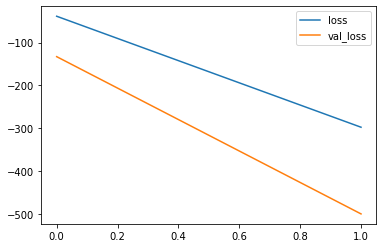

In [76]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

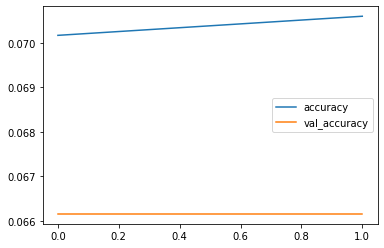

In [77]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [97]:
# Predicting the sentiment of any text

def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

# predicting the class
  predicted_sentiment = model.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('It is a positive sentiment'))
  else:
    return(print('It is a negative sentiment'))

text = ['4']
predict_sentiment(text)

It is a positive sentiment


In [96]:
# saving the model for future purpose
model.save('sentiment analysis.h5')   # creates HDF5 file for model